In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


import pandas as pd #data
import numpy as np #comp
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
data_train = pd.read_csv('input/appstore_games.csv',engine = 'python',encoding='UTF-8')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [3]:
data_train.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [4]:
data_train.head(10)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12105d3d0>,
      dtype=object)

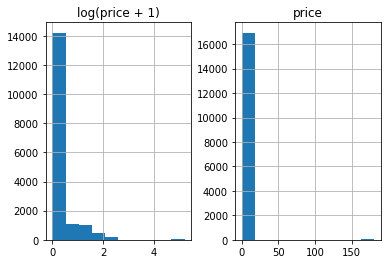

In [5]:
prices = pd.DataFrame({"price":data_train["Price"], "log(price + 1)":np.log1p(data_train["Price"])})
prices.hist()

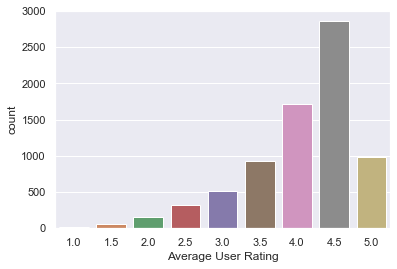

In [6]:
data_train['Average User Rating'].dropna(inplace = True)
sns.set()
sns.countplot(x = 'Average User Rating', data = data_train)

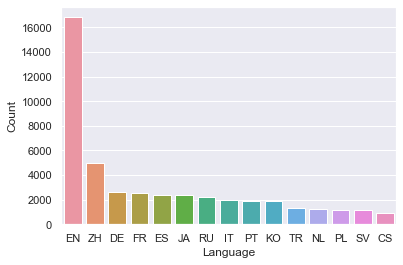

In [7]:
languages = pd.DataFrame(data_train['Languages'].str.split(', ',expand=True))
languages = pd.DataFrame(languages.values.ravel(), columns = ["Languages"])
languages = pd.DataFrame(languages['Languages'].value_counts().reset_index())
# rename columns
languages.columns = ['Language', 'Count']
sns.barplot(x="Language", y="Count", data=languages.head(15))

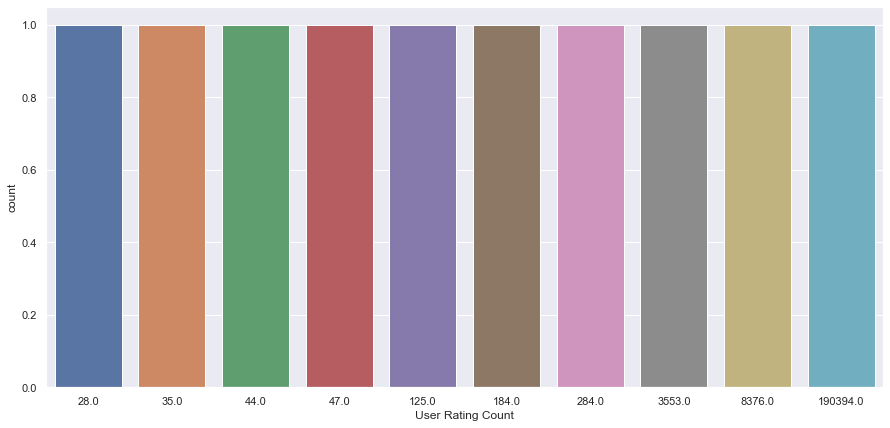

In [10]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'User Rating Count', data = data_train.head(10))

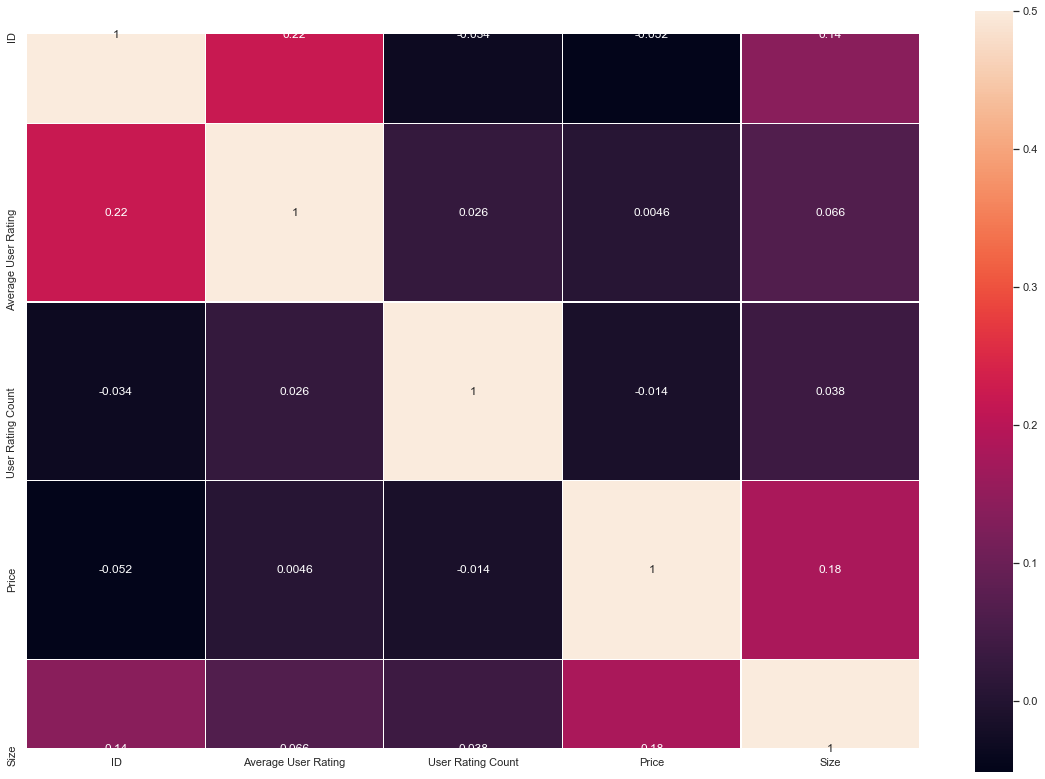

In [66]:
plt.figure(figsize=(20,14))
sns.heatmap(data_train.corr(),linewidths=0.1,vmax=0.5,square=True,linecolor='white',annot=True)
plt.show()

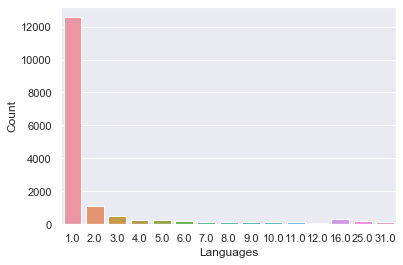

In [12]:
multi = data_train['Languages'].str.count(r', ') + 1
multi_lingual = pd.DataFrame(multi.value_counts().reset_index())
multi_lingual.columns = ['Languages', 'Count']
sns.barplot(x="Languages", y="Count", data=multi_lingual.head(15));

In [16]:
data_train['Original Release Date'] = pd.to_datetime(data_train['Original Release Date'])
data_train['Current Version Release Date'] = pd.to_datetime(data_train['Current Version Release Date'])
#New column for time gap between release & update
data_train['Update_Gap']=data_train.Current_Version_Date-data_train.Release_Date
data_train.head(10)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Release_Date,Current_Version_Date,Update_Gap
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,2008-11-07,2017-05-30,3126 days
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,2008-11-07,2018-05-17,3478 days
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,2008-11-07,2017-05-09,3105 days
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,2008-07-23,2017-05-30,3233 days
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,2008-07-18,2018-07-22,3656 days
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",...,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-07-30,2019-04-29,2008-07-30,2019-04-29,3925 days
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",...,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",2008-07-30,2013-11-14,2008-07-30,2013-11-14,1933 days
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,4+,EN,64333824.0,Games,"Games, Strategy, Board",2008-03-08,2018-03-10,2008-03-08,2018-03-10,3654 days
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",...,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",2008-03-08,2017-11-23,2008-03-08,2017-11-23,3547 days
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,4+,EN,1466515.0,Games,"Games, Casual, Strategy",2008-01-08,2008-01-08,2008-01-08,2008-01-08,0 days


In [17]:
data_train['Genres'] = data_train['Genres'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
data_train['Genre'] = data_train['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
data_train['Genre']=data_train['Genres'].str.strip()
Non_Main_Genre=data_train[~data_train.Genres.str.contains('Puzzle') & \
                           ~data_train.Genres.str.contains('Action') & \
                           ~data_train.Genres.str.contains('Family')& \
                           ~data_train.Genres.str.contains('Education')& \
                           ~data_train.Genres.str.contains('Family')& \
                           ~data_train.Genres.str.contains('Adventure')&\
                           ~data_train.Genres.str.contains('Board')&\
                           ~data_train.Genres.str.contains('Role')].index
data_train.drop(Non_Main_Genre , inplace=True)
data_train.loc[data_train['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
data_train.loc[data_train['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
data_train.loc[data_train['Genres'].str.contains('Action'),'Genres'] = 'Action'
data_train.loc[data_train['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
data_train.loc[data_train['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
data_train.loc[data_train['Genres'].str.contains('Family'),'Genres'] = 'Family'
data_train.loc[data_train['Genres'].str.contains('Education'),'Genres'] = 'Family'

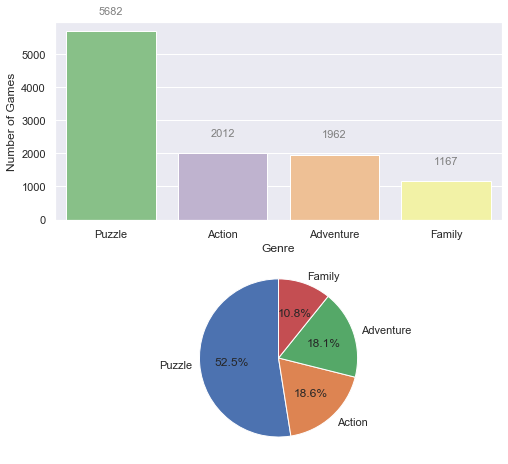

In [19]:
sns.set_style('darkgrid')
f, axes = plt.subplots (2,1, figsize=(8,8))

#Histogram
x=['Puzzle','Action','Adventure','Family']
y = [data_train.Genres[(data_train['Genres']=='Puzzle')].count(),data_train.Genres[(data_train['Genres']=='Action')].count(),\
     data_train.Genres[(data_train['Genres']=='Adventure')].count(),data_train.Genres[(data_train['Genres']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genre',ylabel='Number of Games')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

#Pie Chart
NG = [data_train.Genres[(data_train['Genres']=='Puzzle')].count(),data_train.Genres[(data_train['Genres']=='Action')].count(),\
     data_train.Genres[(data_train['Genres']=='Adventure')].count(),data_train.Genres[(data_train['Genres']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

In [25]:
data_train_1 = data_train.loc[data_train["User Rating Count"]>=10,:].copy()

In [29]:
data_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 16993
Data columns (total 22 columns):
URL                             3903 non-null object
ID                              3903 non-null int64
Name                            3903 non-null object
Subtitle                        1401 non-null object
Icon URL                        3903 non-null object
Average User Rating             3903 non-null float64
User Rating Count               3903 non-null float64
Price                           3903 non-null float64
In-app Purchases                2473 non-null object
Description                     3903 non-null object
Developer                       3903 non-null object
Age Rating                      3903 non-null object
Languages                       3891 non-null object
Size                            3903 non-null float64
Primary Genre                   3903 non-null object
Genres                          3903 non-null object
Original Release Date           3903 non-

In [40]:
data_train_1 = data_train_1.drop(columns="URL")
data_train_1 = data_train_1.drop(columns="Icon URL")
data_train_1 = data_train_1.drop(columns="Original Release Date")
data_train_1 = data_train_1.drop(columns="Current Version Release Date")
data_train_1 = data_train_1.drop(columns="Genres")
data_train_1.head(5)

KeyError: "['URL'] not found in axis"

In [35]:
data_train_1 = data_train_1.drop(columns="Genres")
data_train_1.head(5)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Release_Date,Current_Version_Date,Update_Gap,Genre
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,2008-11-07,2017-05-30,3126 days,Puzzle
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,2008-11-07,2018-05-17,3478 days,Board
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,2008-11-07,2017-05-09,3105 days,Board
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,2008-07-23,2017-05-30,3233 days,Puzzle
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,2008-07-18,2018-07-22,3656 days,Board Education


In [36]:
data_train_1.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Release_Date','Current_Version_Date','Update_Gap','Genre']
data_train_1.head(5)

,ID,Name,Subtitle,User_Rating,User_Rating_Count,Price,In_App_Purchase,Desc,Dev,Age_Rating,Languages,Size,Primary_Genre,Release_Date,Current_Version_Date,Update_Gap,Genre
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,2008-11-07,2017-05-30,3126 days,Puzzle
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,2008-11-07,2018-05-17,3478 days,Board
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,2008-11-07,2017-05-09,3105 days,Board
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,2008-07-23,2017-05-30,3233 days,Puzzle
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,2008-07-18,2018-07-22,3656 days,Board Education


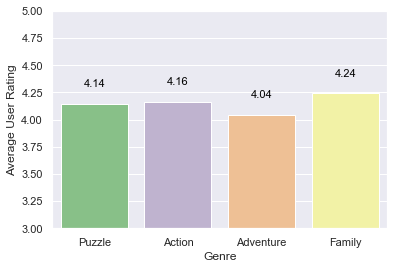

In [38]:
x=['Puzzle','Action','Adventure','Family']
y = [data_train_1.User_Rating[(data_train_1['Genre']=='Puzzle')].mean(),\
     data_train_1.User_Rating[(data_train_1['Genre']=='Action')].mean(),\
     data_train_1.User_Rating[(data_train_1['Genre']=='Adventure')].mean(),\
     data_train_1.User_Rating[(data_train_1['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Average User Rating')
vis1.set(ylim=(3,5))


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.ioff()

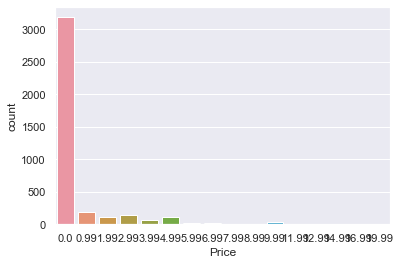

In [42]:
data_train_1['Price'].dropna(inplace=True)
sns.set()
sns.countplot(x="Price", data=data_train_1)

In [83]:
def in_app_p(row):
    
    x=row["In_App_Purchase"]
    if isinstance(x,np.float64) or pd.isnull(x):
        row["In_App_Count"]= 0
        row["In_App_Max"]  = 0
    else:
        x_list=[float(x) for x in row["In_App_Purchase"].split(",")]
        row["In_App_Count"]=len(x_list)
        row["In_App_Max"]=max(x_list)
    return row 
def languages(row):
    if pd.isnull(row["Languages"]):
        row["Languages"]="EN"
    if "EN" in row["Languages"]:
        row["Language_EN"]=1
    else:
        row["Language_EN"]=0
    row["Languages_Count"]=len(row["Languages"].split(","))
    
    return row
def genres(row):
    #row["Genres_Count"] = len(row["Genres"].split())
    if "Adventure" in row["Genre"]:
        row["Genre_Adventure"] = 1
    else:
        row["Genre_Adventure"] = 0
    if "Family" in row["Genre"]:
        row["Genre_Family"] = 1
    else:
        row["Genre_Family"] = 0
        
    return row
def Update_Gap_transform(row):
    row["Update_Gap"] = row["Update_Gap"].astype(int)
    return row

In [85]:
if __name__ == '__main__':
    try:
        data_train_2 = data_train_1.copy()
        data_train_2 = data_train_2.assign(Great_App=lambda x: np.where(x["User_Rating"]>=4.5,1,0))\
                 .assign(Subtitle_Present=lambda x: np.where(x["Subtitle"].isnull(),0,1))\
                 .assign(Price=lambda x: np.where(x["Price"]>=10,10,x["Price"]))\
                 .assign(Price_Free=lambda x: np.where(x["Price"]==0,1,0))\
                 .assign(Age_Rating=lambda x: x["Age_Rating"].str.replace("+","").astype(int))\
                 .assign(Description_Length=lambda x: x["Desc"].str.len())\
                 .apply(genres,axis=1)\
                 .apply(languages,axis=1)\
                 .apply(in_app_p,axis=1)\
                 .drop(columns=["ID","Name","Subtitle","Primary_Genre","In_App_Purchase","Dev","Desc","Languages","User_Rating",
                                "Release_Date","Current_Version_Date","Genre","Age_Rating"])
        
    except:
        print('data_train2 transform error')
data_train_2.head(5)

,User_Rating_Count,Price,Size,Update_Gap,Great_App,Subtitle_Present,Price_Free,Description_Length,Genre_Adventure,Genre_Family,Language_EN,Languages_Count,In_App_Count,In_App_Max
0,3553.0,2.99,15853568.0,3126 days,0,0,0,1617,0,0,1,17,0,0.0
1,284.0,1.99,12328960.0,3478 days,0,0,0,1222,0,0,1,1,0,0.0
2,8376.0,0.00,674816.0,3105 days,0,0,1,582,0,0,1,1,0,0.0
3,190394.0,0.00,21552128.0,3233 days,0,0,1,1675,0,0,1,17,0,0.0
4,28.0,2.99,34689024.0,3656 days,0,0,0,2076,0,0,1,15,0,0.0


In [80]:
#data_train_2['Update_Gap'].dtypes
data_train_2['Update_Gap'] = data_train_2['Update_Gap'].astype(int)
print(data_train_2['Update_Gap'].dtypes)
data_train_2.head(5)

int64


,User_Rating_Count,Price,Size,Update_Gap,Great_App,Subtitle_Present,Price_Free,Description_Length,Genre_Adventure,Genre_Family,Language_EN,Languages_Count,In_App_Count,In_App_Max
0,3553.0,2.99,15853568.0,270086400000000000,0,0,0,1617,0,0,1,17,0,0.0
1,284.0,1.99,12328960.0,300499200000000000,0,0,0,1222,0,0,1,1,0,0.0
2,8376.0,0.00,674816.0,268272000000000000,0,0,1,582,0,0,1,1,0,0.0
3,190394.0,0.00,21552128.0,279331200000000000,0,0,1,1675,0,0,1,17,0,0.0
4,28.0,2.99,34689024.0,315878400000000000,0,0,0,2076,0,0,1,15,0,0.0


In [57]:
data_train_1.to_csv("input/appstore_games_1.csv", index=False)

In [58]:
data_train_2.to_csv("input/appstore_games_2.csv", index=False)